### In this notebook we create the graphics that will appear in the paper.
We load the data and plot different graphics combinations to show our results in the best way.

---

In [2]:
#Import libraries
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spl
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
np.set_printoptions( linewidth=1000 )
import timeit
import CircuitClass_SWTPauliBasis as CClass #Import the circuit class defined to create circuits.
from matplotlib import pyplot as plt
import csv
from matplotlib.lines import Line2D
np.set_printoptions( linewidth=1000 )
from matplotlib import rcParams, rcParamsDefault

In [3]:
# Useful functions.
def pauli_recomposition_4x4(P):
    '''Recomposes a 4x4 matrix from its pauli decomposition.
    
    Input:
    P= Pauli coefficients.
    rd= number of decimals to use when rounding a number.
    
    Output:
    A= matrix such that such that A = ΣP[i,j]σ_iσ_j where i,j=0, 1, 2, 3. '''
    
    i  = np.eye(2)  #σ_0     
    σx = np.array([[0, 1], [1, 0]])
    σy = np.array([[0, -1j], [1j, 0]])
    σz = np.array([[1, 0], [0, -1]])
    s = [i, σx, σy, σz] #array containing the matrices.
    labels = ['I', 'σx', 'σy', 'σz'] # useful to print the result.
    
    A=sum(P[o1][o2]*np.kron(O1,O2)
                for o1, O1 in enumerate(s)
                for o2, O2 in enumerate(s))
    
    return A


def zero_if_close(a, tol):
    a.real[abs(a.real) < tol] = 0.0
    a.imag[abs(a.imag) < tol] = 0.0
    return a

def export(fig_title):
    plt.gcf()
    plt.margins(0,0)
    plt.savefig(fig_title, bbox_inches = 'tight', pad_inches = 0)
    
def setlabel(ax, label, loc=2, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(np.NaN,np.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],loc=loc,handlelength=0,handleheight=0,handletextpad=0,borderaxespad=0,borderpad=borderpad,frameon=False,**kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()    

In [4]:
# Define a function to extract the data from the txt. 
def txt_to_npz(EJ, EC, alpha, beta, nmax, c, g, original=True):
    
    if original==True: 
        #Open first.txt to extract the lenghts.
        lines = []                             # Declare an empty list to store lines.
        with open ('r'+str(EJ/EC[0])+'EJ'+str(EJ)+'alpha'+str(alpha[0])+'beta'+str(beta[0])+'nmax'+str(nmax[0])+'_jj_g'+str(g)+'c'+str(c)+'.dat', 'rt') as txt: # Open .txt for reading text data.
            for line in txt:                # For each line, stored as line.
                lines.append(line)
    elif original==False:
        #Open first.txt to extract the lenghts.
        lines = []                             # Declare an empty list to store lines.
        with open ('r'+str(EJ/EC[0])+'EJ'+str(EJ)+'alpha'+str(alpha[0])+'beta'+str(beta[0])+'nmax'+str(nmax[0])+'_jj_g'+str(g)+'c'+str(c)+'_2.dat', 'rt') as txt: # Open .txt for reading text data.
            for line in txt:                # For each line, stored as line.
                lines.append(line)
        
    #Extract the data from lines.
    gamma=lines[1].split() #remember that the first line are the coments so gamma = second line.
    for i in range(len(gamma)): 
        gamma[i]=complex(gamma[i])
        
    P=np.zeros((len(gamma), 4, 4, len(EC), len(alpha), len(beta), len(nmax)),dtype=complex) #Matrix to store the P_ij values.
    E=np.zeros((len(gamma),7,len(EC), len(alpha), len(beta), len(nmax)),dtype=complex) #Matrix to store the energies values.
    Eq=np.zeros((len(gamma),4,len(EC), len(alpha), len(beta), len(nmax)),dtype=complex) #Matrix to store the effective energies values.
    
    #Store the data.
    for i,j in enumerate(nmax):
        for k,l in enumerate(beta):
            for m,n in enumerate(alpha):
                for p,q in enumerate(EC):
                    if original==True:
                        lines = []                             # Declare an empty list to store lines.
                        with open ('r'+str(EJ/q)+'EJ'+str(EJ)+'alpha'+str(n)+'beta'+str(l)+'nmax'+str(j)+'_jj_g'+str(g)+'c'+str(c)+'.dat', 'rt') as txt: # Open .txt for reading text data.
                            for line in txt:                # For each line, stored as line.
                                lines.append(line)
                    elif original==False:
                        lines = []                             # Declare an empty list to store lines.
                        with open ('r'+str(EJ/q)+'EJ'+str(EJ)+'alpha'+str(n)+'beta'+str(l)+'nmax'+str(j)+'_jj_g'+str(g)+'c'+str(c)+'_2.dat', 'rt') as txt: # Open .txt for reading text data.
                            for line in txt:                # For each line, stored as line.
                                lines.append(line)
    
                    #Extract the data from lines.
                    for r in range(7):
                        E_aux= lines[r+2].split() #rows from 2 to 8 give the energies.
                        for s in range(len(E_aux)):
                            E_aux[s]=complex(E_aux[s])
                        E[:,r,p,m,k,i]=E_aux
        
                    P_aux=lines[9].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,0,0,p,m,k,i]=P_aux
                    
                    P_aux=lines[10].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,1,1,p,m,k,i]=P_aux
                    
                    P_aux=lines[11].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,2,2,p,m,k,i]=P_aux
                    
                    P_aux=lines[12].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,3,3,p,m,k,i]=P_aux
                    
                    P_aux=lines[13].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,0,1,p,m,k,i]=P_aux
                    
                    P_aux=lines[14].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,1,0,p,m,k,i]=P_aux
                    
                    P_aux=lines[15].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,0,2,p,m,k,i]=P_aux
                    
                    P_aux=lines[16].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,2,0,p,m,k,i]=P_aux
                    
                    P_aux=lines[17].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,0,3,p,m,k,i]=P_aux
                    
                    P_aux=lines[18].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,3,0,p,m,k,i]=P_aux
                    
                    P_aux=lines[19].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,1,2,p,m,k,i]=P_aux
                    
                    P_aux=lines[20].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,2,1,p,m,k,i]=P_aux
                    
                    P_aux=lines[21].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,1,3,p,m,k,i]=P_aux
                    
                    P_aux=lines[22].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,3,1,p,m,k,i]=P_aux
                    
                    P_aux=lines[23].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,2,3,p,m,k,i]=P_aux
                    
                    P_aux=lines[24].split()
                    for s in range(len(P_aux)): 
                        P_aux[s]=complex(P_aux[s])
                    P[:,3,2,p,m,k,i]=P_aux
                    
                    for s in range(len(gamma)):

                        Eq[s,:,p,m,k,i],_=np.linalg.eigh(pauli_recomposition_4x4(P[s,:,:,p,m,k,i]))
    
    E=np.real_if_close(E)
    Eq=np.real_if_close(Eq)
    P=np.real_if_close(zero_if_close(P,1e-10))
    gamma=np.real_if_close(gamma)
    
    return gamma, E, Eq, P

---
## Simple JJ Coupling with ground in $\Phi_1$ and $\Phi_{2'}$, configuration number 1 (c1g1)

<img src="JJC_g1c1.png"
     style=" width: 700px;"/>

### Dependency on qubit parameters ($\alpha$, $r=E_J/E_C$, $\beta$)

In [5]:
#Load data for β=0.
#Set parameters.
flux1=0.5*2*np.pi
flux2=0.5*2*np.pi
EJ=1
nmax=[15]
n0=10
rd=10
e=1e-4
β=[0]
α=np.array([0.65, 0.7, 0.75, 0.8])
EC=np.array([1/50, 1/70, 1/90])

#Load the results.
γ, E1, Eq1, P1 = txt_to_npz(EJ, EC, α, β, nmax, 1, 1)

#Load data for β!=0.
#Set parameters.
e=1e-4
β=[0, 0.5, 1]
αb=np.array([0.55, 0.75, 0.9])
ECb=np.array([1/50, 1/70, 1/90])

#Load the results.
γb, E1b, Eq1b, P1b = txt_to_npz(EJ, ECb, αb, β, nmax, 1, 1)

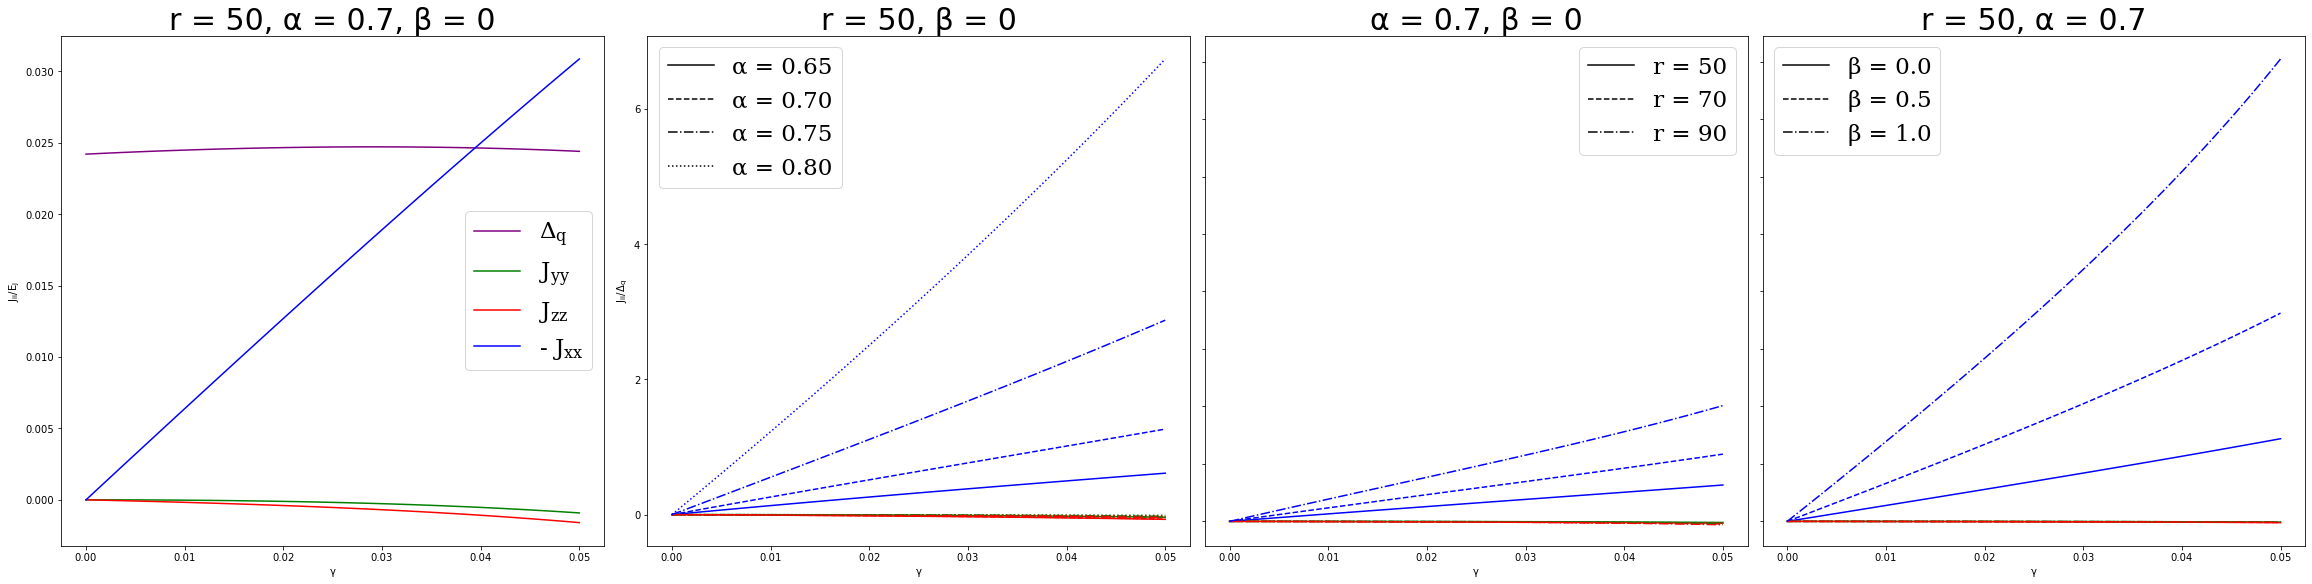

In [6]:
#Plot the results: effective Hamiltonian constants ratio, summary plots.
fig,(ax1, ax2, ax3, ax4)=plt.subplots(ncols=4, nrows=1, figsize=(32, 8), constrained_layout=True)
lines=['-','--','-.',':','-', '--', '-.',':']
colors=['blue','green','red']

SMALLER_SIZE = 12
SMALL_SIZE = 23
MEDIUM_SIZE = 23
BIGGER_SIZE = 30
ENORMOUS_SIZE = 34

#plt.rc('text', usetex=True)
plt.rc('font', family='serif')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the title
plt.rc('axes', labelsize=ENORMOUS_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize


custom_lines=[Line2D([0], [0], color='k', ls=lines[0]),
                Line2D([0], [0], color='k', ls=lines[1]),
                Line2D([0], [0], color='k', ls=lines[2]),
                  Line2D([0], [0], color='k', ls=lines[3])]

ax1.plot(γ[:], -P1[:,0,3,0,1,0,0]*2, c='purple', label='$\mathdefault{\Delta_q}$')
ax1.plot(γ[:], P1[:,2,2,0,1,0,0], c=colors[1], label='$\mathdefault{J_{yy}}$')
ax1.plot(γ[:], P1[:,3,3,0,1,0,0], c=colors[2], label='$\mathdefault{J_{zz}}$')
ax1.plot(γ[:], -P1[:,1,1,0,1,0,0], c=colors[0], label='- $\mathdefault{J_{xx}}$')
ax1.legend()
ax1.set_xlabel('γ')
ax1.set_ylabel('$\mathdefault{J_{ii}/E_J}$') 
ax1.set_title('r = 50, α = 0.7, β = 0')


x=0
for a, A in enumerate(α):
    ax2.plot(γ[:], P1[:,2,2,0,a,0,0]/(-2*P1[:,0,3,0,a,0,0]), c=colors[1], ls = lines[x], label='α ='+str(A))
    ax2.plot(γ[:], P1[:,3,3,0,a,0,0]/(-2*P1[:,0,3,0,a,0,0]), c=colors[2], ls = lines[x], label='α ='+str(A))
    ax2.plot(γ[:], -P1[:,1,1,0,a,0,0]/(-2*P1[:,0,3,0,a,0,0]), c=colors[0], ls = lines[x], label='α ='+str(A))
    x+=1
ax2.legend(custom_lines,['α = 0.65', 'α = 0.70', 'α = 0.75', 'α = 0.80'] )
ax2.set_xlabel('γ')
ax2.set_ylabel('$\mathdefault{J_{ii}/Δ_q}$') 
ax2.set_title('r = 50, β = 0')

x=0
for c, C in enumerate(EC):
    ax3.plot(γ[:], P1[:,2,2,c,1,0,0]/(-2*P1[:,0,3,c,1,0,0]), c=colors[1], ls = lines[x], label='r = '+str(EJ/C))
    ax3.plot(γ[:], P1[:,3,3,c,1,0,0]/(-2*P1[:,0,3,c,1,0,0]), c=colors[2], ls = lines[x], label='r = '+str(EJ/C))
    ax3.plot(γ[:], -P1[:,1,1,c,1,0,0]/(-2*P1[:,0,3,c,1,0,0]), c=colors[0], ls = lines[x], label='r = '+str(EJ/C))
    x+=1
    
ax3.legend(custom_lines,['r = 50', 'r = 70', 'r = 90'] )
ax3.set_xlabel('γ')
ax3.set_title('α = 0.7, β = 0')

x=0
for b, B in enumerate(β):
    ax4.plot(γb[:], P1b[:,2,2,0,1,b,0]/(-2*P1b[:,0,3,0,1,b,0]), c=colors[1], ls = lines[x], label='β = '+str(B))
    ax4.plot(γb[:], P1b[:,3,3,0,1,b,0]/(-2*P1b[:,0,3,0,1,b,0]), c=colors[2], ls = lines[x], label='β = '+str(B))
    ax4.plot(γb[:], -P1b[:,1,1,0,1,b,0]/(-2*P1b[:,0,3,0,1,b,0]), c=colors[0], ls = lines[x], label='β = '+str(B))
    x+=1

ax4.legend(custom_lines,['β = 0.0', 'β = 0.5', 'β = 1.0'] )
ax4.set_xlabel('γ')
ax4.set_title('r = 50, α = 0.7')

ax2.sharey(ax3)
ax4.set_yticklabels([])
ax3.sharey(ax4)

#export('JJ_g1c1_CouplingStrengths.pdf')

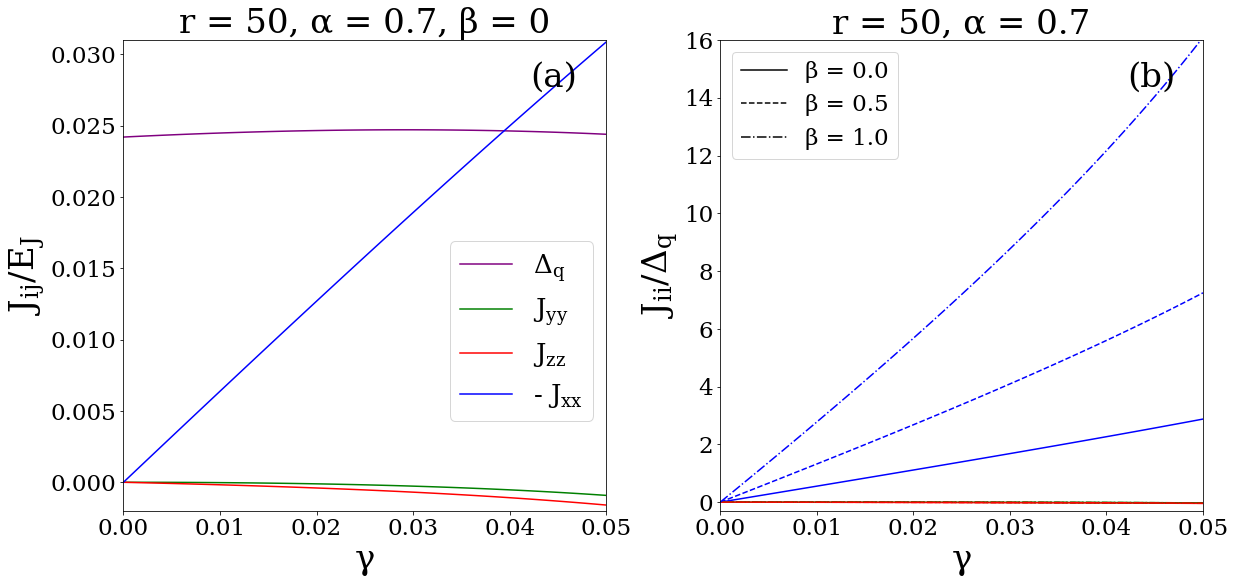

In [8]:
#Plot the results: effective Hamiltonian constants ratio, summary plots.
fig,(ax1, ax4)=plt.subplots(ncols=2, nrows=1, figsize=(17, 8), constrained_layout=True)
lines=['-','--','-.',':','-', '--', '-.',':']
colors=['blue','green','red']

SMALLER_SIZE = 12
SMALL_SIZE = 23
MEDIUM_SIZE = 23
BIGGER_SIZE = 30
ENORMOUS_SIZE = 34

#plt.rc('text', usetex=True)
plt.rc('font', family='serif')          # controls default text sizes
plt.rc('axes', titlesize=ENORMOUS_SIZE)     # fontsize of the title
plt.rc('axes', labelsize=ENORMOUS_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize


custom_lines=[Line2D([0], [0], color='k', ls=lines[0]),
                Line2D([0], [0], color='k', ls=lines[1]),
                Line2D([0], [0], color='k', ls=lines[2]),
                  Line2D([0], [0], color='k', ls=lines[3])]

ax1.plot(γ[:], -P1[:,0,3,0,1,0,0]*2, c='purple', label='$\mathdefault{\Delta_q}$')
ax1.plot(γ[:], P1[:,2,2,0,1,0,0], c=colors[1], label='$\mathdefault{J_{yy}}$')
ax1.plot(γ[:], P1[:,3,3,0,1,0,0], c=colors[2], label='$\mathdefault{J_{zz}}$')
ax1.plot(γ[:], -P1[:,1,1,0,1,0,0], c=colors[0], label='- $\mathdefault{J_{xx}}$')
ax1.legend(bbox_to_anchor=(1, 0.6, 0, 0),fontsize=26)
ax1.set_xlabel('γ')
ax1.set_ylabel('$\mathdefault{J_{ij}/E_J}$') 
ax1.set_title('r = 50, α = 0.7, β = 0')
ax1.set_xlim([0,0.05])
ax1.set_ylim([-0.002,0.031])

x=0
for b, B in enumerate(β):
    ax4.plot(γb[:], P1b[:,2,2,0,1,b,0]/(-2*P1b[:,0,3,0,1,b,0]), c=colors[1], ls = lines[x], label='β = '+str(B))
    ax4.plot(γb[:], P1b[:,3,3,0,1,b,0]/(-2*P1b[:,0,3,0,1,b,0]), c=colors[2], ls = lines[x], label='β = '+str(B))
    ax4.plot(γb[:], -P1b[:,1,1,0,1,b,0]/(-2*P1b[:,0,3,0,1,b,0]), c=colors[0], ls = lines[x], label='β = '+str(B))
    x+=1

ax4.legend(custom_lines,['β = 0.0', 'β = 0.5', 'β = 1.0'] )
ax4.set_xlabel('γ')
ax4.set_ylabel('$\mathdefault{J_{ii}/\Delta_q}$') 
ax4.set_title('r = 50, α = 0.7')
ax4.set_xlim([0,0.05])
ax4.set_ylim([-0.3,16])

setlabel(ax1, '(a)', bbox_to_anchor=(0.78, 1.02, 0, 0), borderpad=0.9, fontsize=34)
setlabel(ax4, '(b)', bbox_to_anchor=(0.78, 1.02, 0, 0), borderpad=0.9, fontsize=34)


export('JJ_g1c1_CouplingStrengths.pdf')